# Introduction 

In the following notebook, I will be exploring  2020_0506_Weather_Energy.csv file which contains time series data pertaining to energy consumption and weather in Spain. In this notebook, I intend to find features and relationships worthy of exploring further with times series modeling techniques.

* Data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)

* Original raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)

**Read in libraries for notebook**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Set notebook preferences**

In [19]:
#Set preferences for pandas 
pd.set_option("display.max_columns", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')

**Read in data**

In [20]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0506_Weather_Energy.csv', index_col=0)

# Data Overview

**Data Dictionary**

* index: Datetime index localized to CET
* city_name: name of city
* clouds_all: cloud cover in %
* forecast solar day ahead: forecasted solar generation
* forecast wind onshore day ahead: forecasted onshore wind generation
* generation biomass: biomass generation in MW
* generation fossil brown coal/lignite: coal/lignite generation in MW
* generation fossil gas: gas generation in MW
* generation fossil hard coal: coal generation in MW
* generation fossil oil: oil generation in MW
* generation hydro pumped storage consumption: hydro2 generation in MW
* generation hydro run-of-river and poundage: hydro3 generation in MW
* generation hydro water reservoir: hydro4 generation in MW
* generation nuclear: nuclear generation in MW
* generation other renewable: other renewable generation in MW
* generation other: other generation in MW
* generation solar: solar generation in MW
* generation waste: waste generation in MW
* generation wind onshore: wind onshore generation in MW
* humidity: humidity in %
* pressure: pressure in hPa
* price actual: price in EUR/MWh
* price day ahead: forecasted price EUR/MWh
* rain_1h: rain in last hour in mm
* rain_3h: rain last 3 hours in mm
* snow_3h: show last 3 hours in mm
* temp: in f
* temp_max: maximum in f
* temp_min: minimum in f
* total load actual: actual electrical demand
* total load forecast: forecasted electrical demand
* weather_main: Short description of current weather
* wind_deg: wind direction
* wind_speed: wind speed in m/s


**Data Preview**

In [21]:
#Print df shape
print('Shape of data:', df.shape)

#View head
df.head()

Shape of data: (178415, 33)


,city_name,clouds_all,forecast solar day ahead,forecast wind onshore day ahead,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,humidity,pressure,price actual,price day ahead,rain_1h,rain_3h,snow_3h,temp,temp_max,temp_min,total load actual,total load forecast,weather_main,wind_deg,wind_speed
2015-01-01 00:00:00,Valencia,0,17.0,6436.0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,77,1001,65.41,50.1,0.0,0.0,0.0,27.185000,27.185000,27.185000,25385.0,26118.0,clear,62,1
2015-01-01 00:00:00,Madrid,0,17.0,6436.0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,63,971,65.41,50.1,0.0,0.0,0.0,21.515000,21.515000,21.515000,25385.0,26118.0,clear,309,1
2015-01-01 00:00:00,Bilbao,0,17.0,6436.0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,97,1036,65.41,50.1,0.0,0.0,0.0,25.713163,25.713163,25.713163,25385.0,26118.0,clear,226,0
2015-01-01 00:00:00,Barcelona,0,17.0,6436.0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,100,1035,65.41,50.1,0.0,0.0,0.0,47.255000,47.255000,47.255000,25385.0,26118.0,clear,58,7
2015-01-01 00:00:00,Seville,0,17.0,6436.0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,75,1039,65.41,50.1,0.0,0.0,0.0,32.405000,32.405000,32.405000,25385.0,26118.0,clear,21,1


**About the data**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178415 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   city_name                                    178415 non-null  object 
 1   clouds_all                                   178415 non-null  int64  
 2   forecast solar day ahead                     178415 non-null  float64
 3   forecast wind onshore day ahead              178415 non-null  float64
 4   generation biomass                           178415 non-null  float64
 5   generation fossil brown coal/lignite         178415 non-null  float64
 6   generation fossil gas                        178415 non-null  float64
 7   generation fossil hard coal                  178415 non-null  float64
 8   generation fossil oil                        178415 non-null  float64
 9   generation hydro pumped storage c

In [23]:
#Sum of missing values per column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clouds_all,178415.0,25.074103,30.775214,0.000,0.00000,20.00,40.0000,100.000
forecast solar day ahead,178415.0,1435.128638,1674.097896,0.000,69.00000,576.00,2621.0000,5836.000
forecast wind onshore day ahead,178415.0,5478.008306,3178.248618,237.000,2985.00000,4861.00,7363.0000,17430.000
generation biomass,178415.0,383.016109,85.250681,0.000,333.00000,366.00,430.0000,592.000
generation fossil brown coal/lignite,178415.0,448.248247,354.341114,0.000,0.00000,509.00,757.0000,999.000
generation fossil gas,178415.0,5626.021097,2203.567902,0.000,4127.00000,4972.00,6435.0000,20034.000
generation fossil hard coal,178415.0,4254.335476,1961.260998,0.000,2526.00000,4473.00,5837.0000,8359.000
generation fossil oil,178415.0,298.163972,52.463808,0.000,263.00000,300.00,330.0000,449.000
generation hydro pumped storage consumption,178415.0,475.477107,792.627066,0.000,0.00000,67.00,616.0000,4523.000
generation hydro run-of-river and poundage,178415.0,972.953636,400.945767,0.000,638.00000,907.00,1251.0000,2000.000


**Data Distributions**

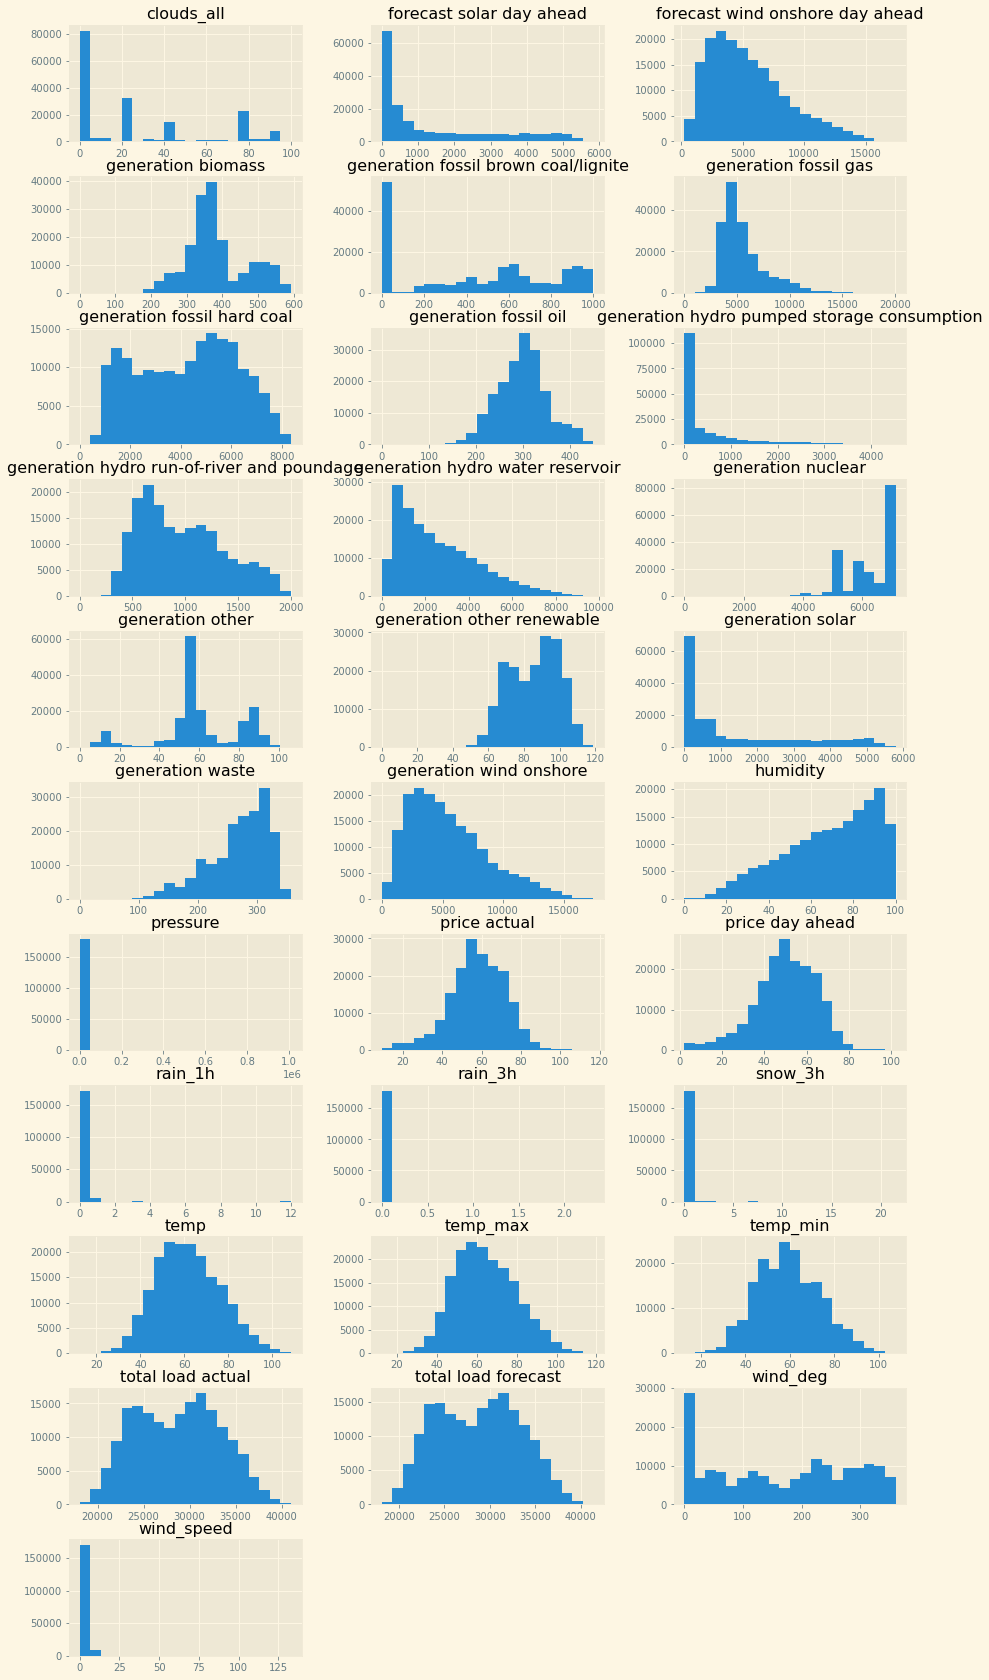

In [39]:
df.hist(bins = 20,layout=(11,3),figsize = (15,30));

# Exploratory Data Analysis

## Time plot of temperatures across all of spain

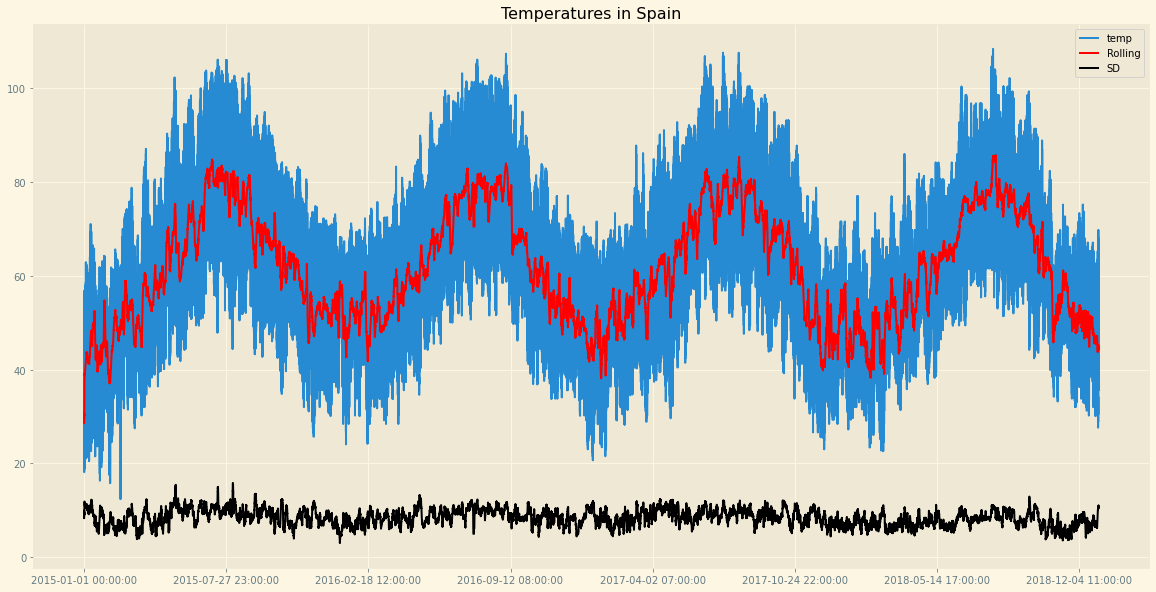

In [25]:
#Set figure
fig, ax = plt.subplots(figsize = (20,10))

#Plot data
j = df.temp.plot(ax=ax)
df.temp.rolling(window = 120, min_periods=7).mean().plot(color = 'r', label = 'Rolling')
df.temp.rolling(window = 120, min_periods=7).std().plot(color = 'black', label = 'SD')

###Set plot aesthetics###
#Title
j.set_title('Temperatures in Spain')
j.legend()

## Time series in specific cities

In [26]:
df.city_name.sort_values().unique()

array(['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia'],
      dtype=object)

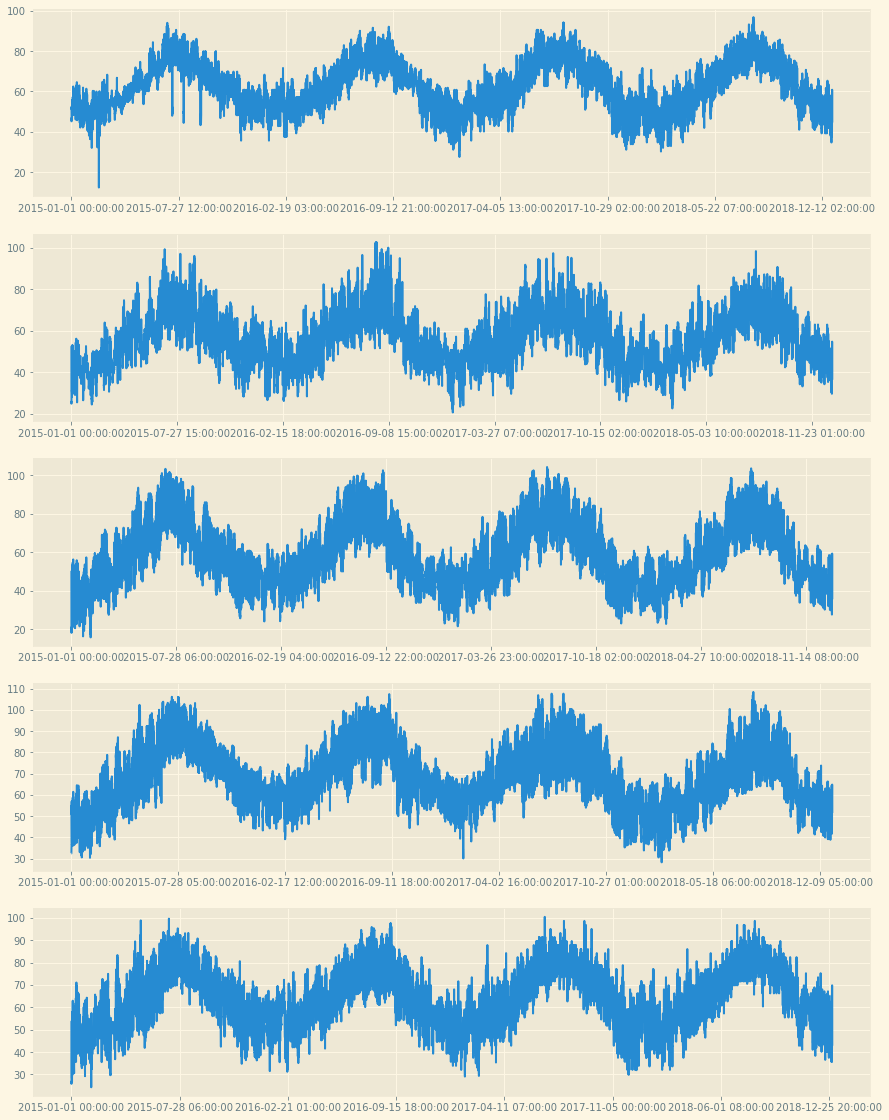

In [27]:
#Set figure
fig, axes = plt.subplots(5,1,figsize = (15,20))

#Plot Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia'
df.loc[df.city_name == 'Barcelona'].temp.plot(ax = axes[0])
df.loc[df.city_name == 'Bilbao'].temp.plot(ax = axes[1])
df.loc[df.city_name == 'Madrid'].temp.plot(ax = axes[2])
df.loc[df.city_name == 'Seville'].temp.plot(ax = axes[3])
df.loc[df.city_name == 'Valencia'].temp.plot(ax = axes[4])

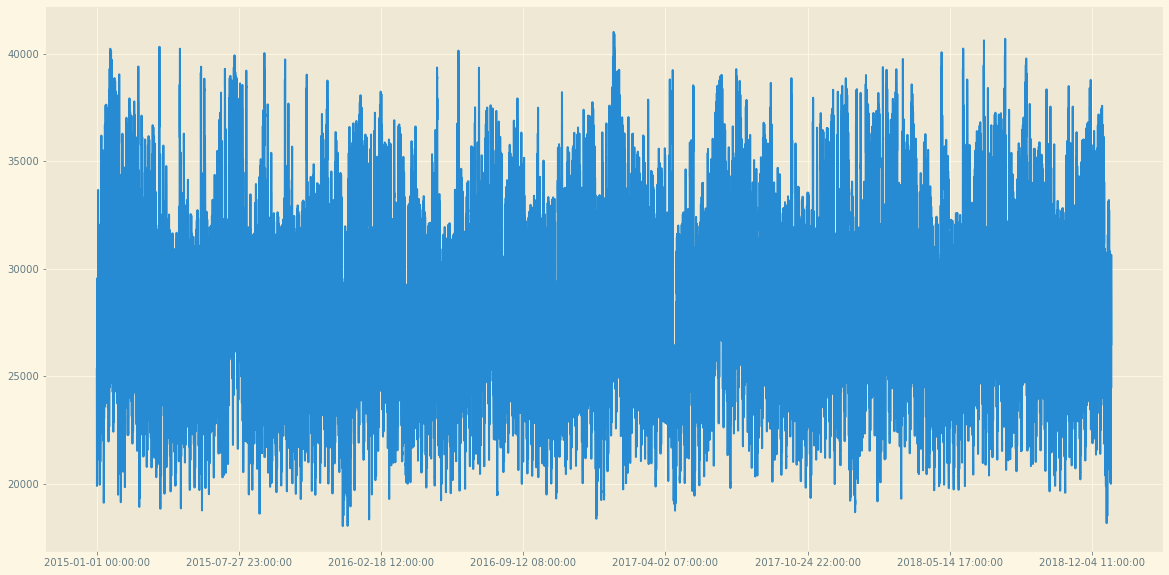

In [28]:
df['total load actual'].plot(figsize = (20,10))

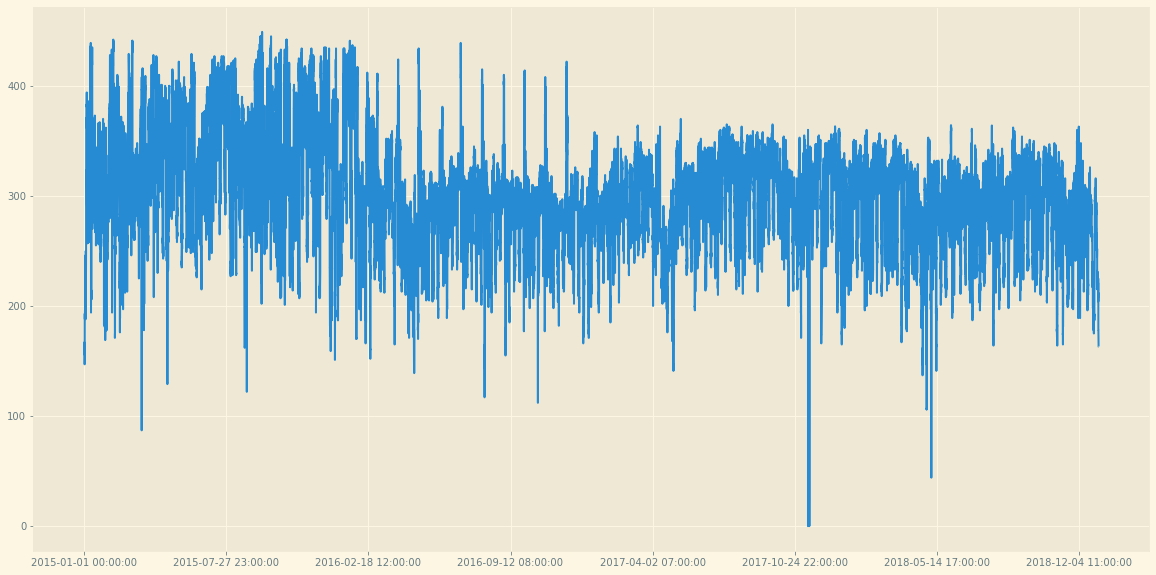

In [29]:
df['generation fossil oil'].plot(figsize = (20,10))

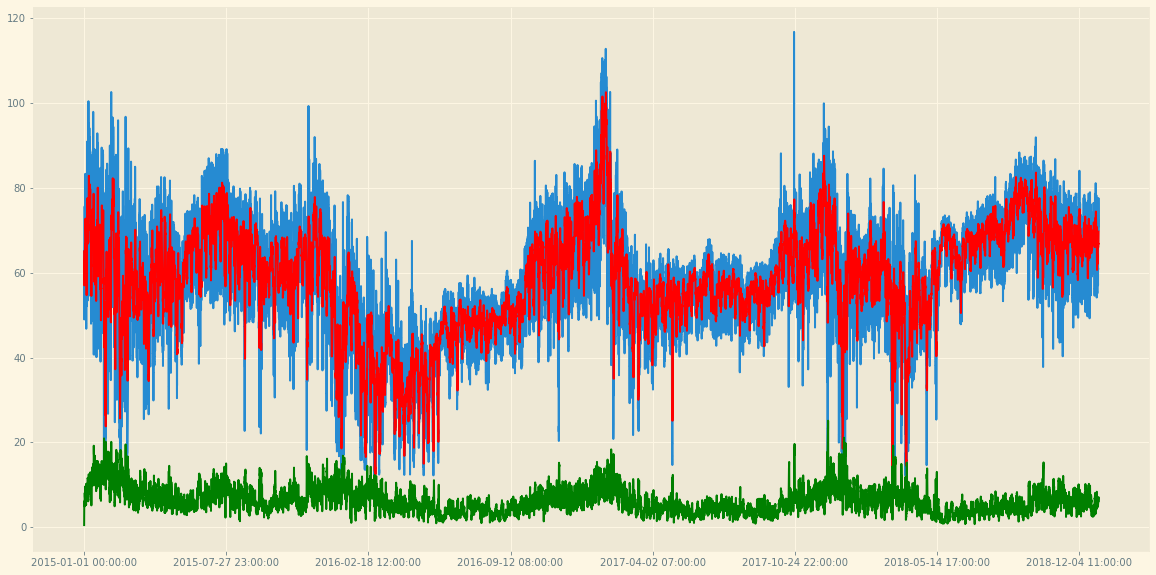

In [31]:
df['price actual'].plot(figsize = (20,10))

df['price actual'].rolling(100,7).mean().plot(color = 'r')
df['price actual'].rolling(100,7).std().plot(color = 'g')